In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA

import rootnotes
import root_numpy
from ROOT import *
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

# local to save all results and images 

save_images = '/home/micael/MyWorkspace/ICA/BlindSeparation/run11'

print 'All imports done!'

All imports done!


/opt/root/lib/ROOT.py:466: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

In [3]:
x = np.loadtxt('EleventhMixture100Stats.txt')
x.shape

(4, 100)

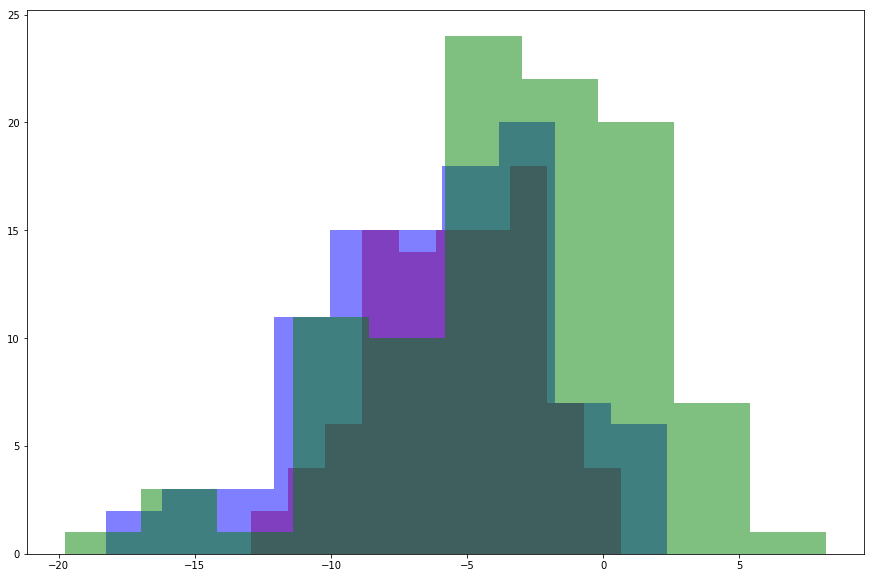

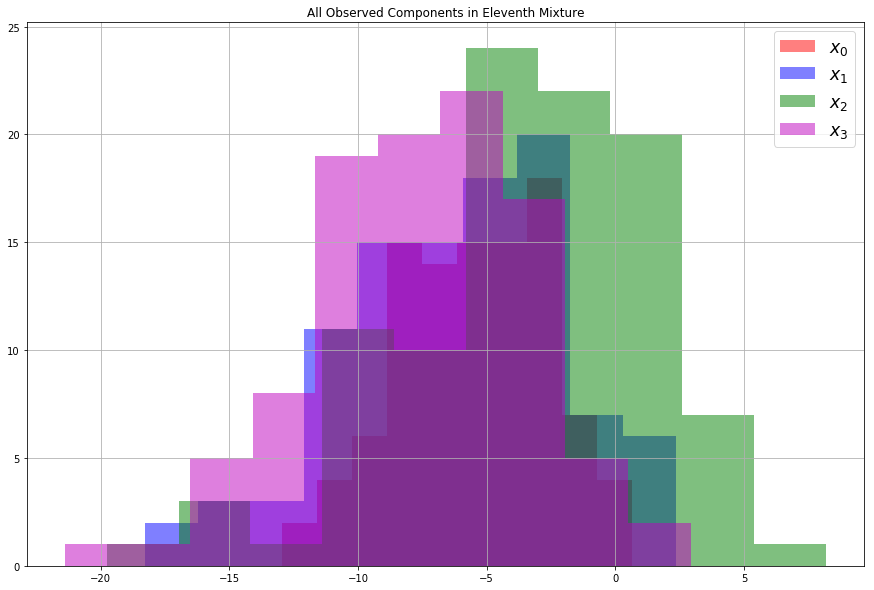

In [5]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in Eleventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture100_all_run11.png')
plt.show()

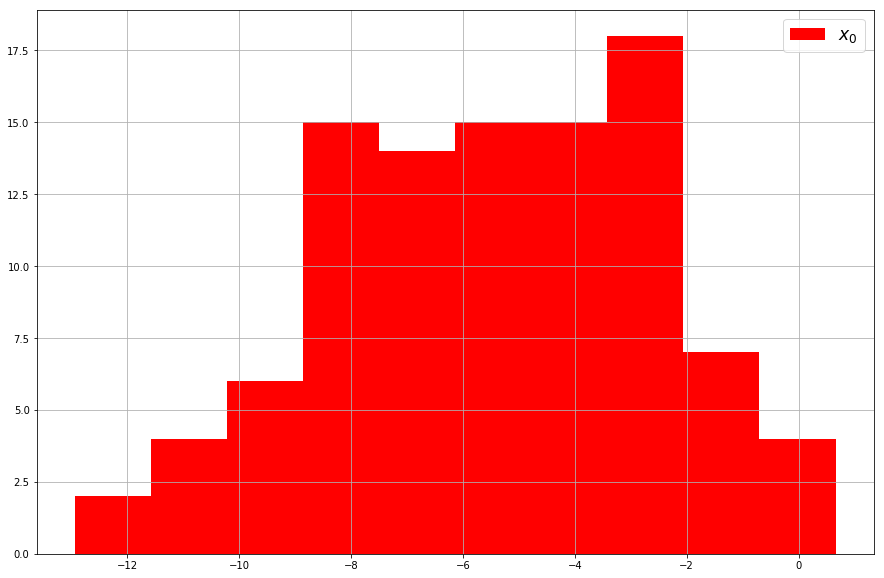

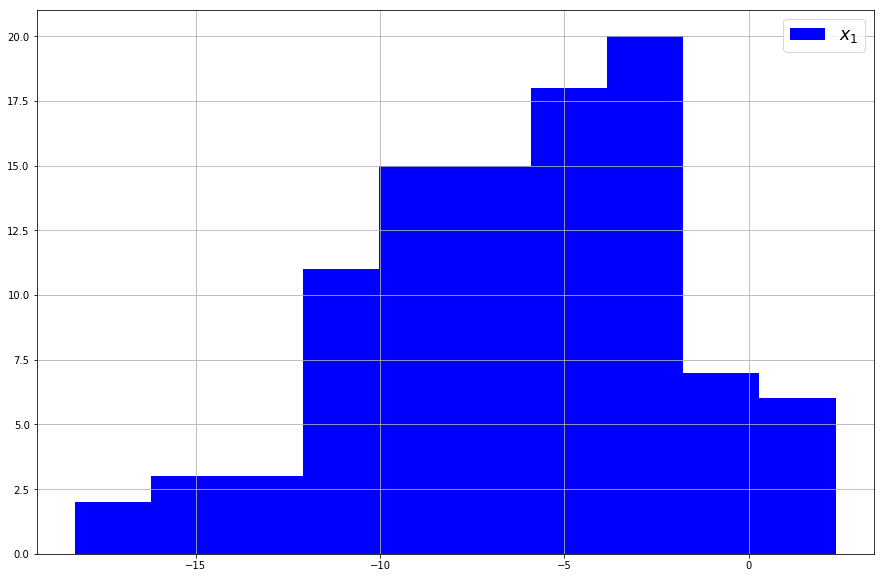

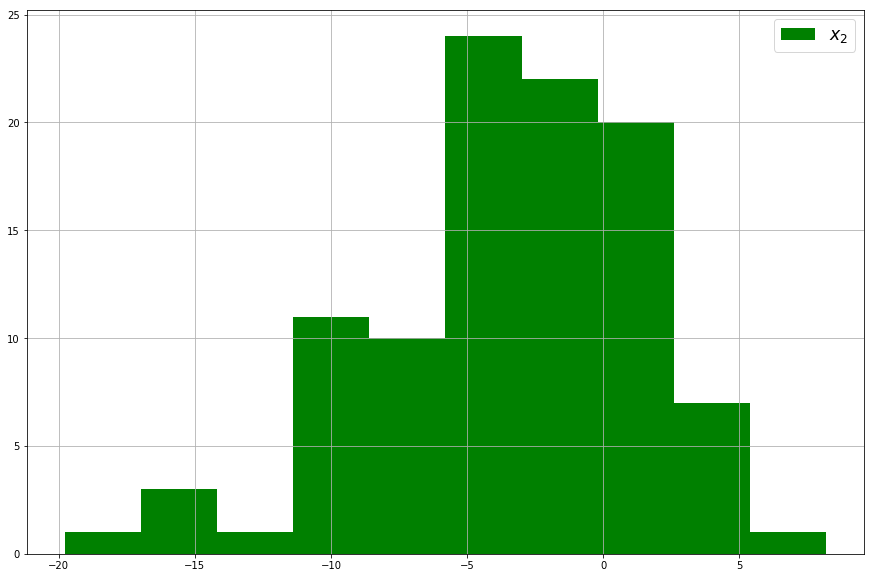

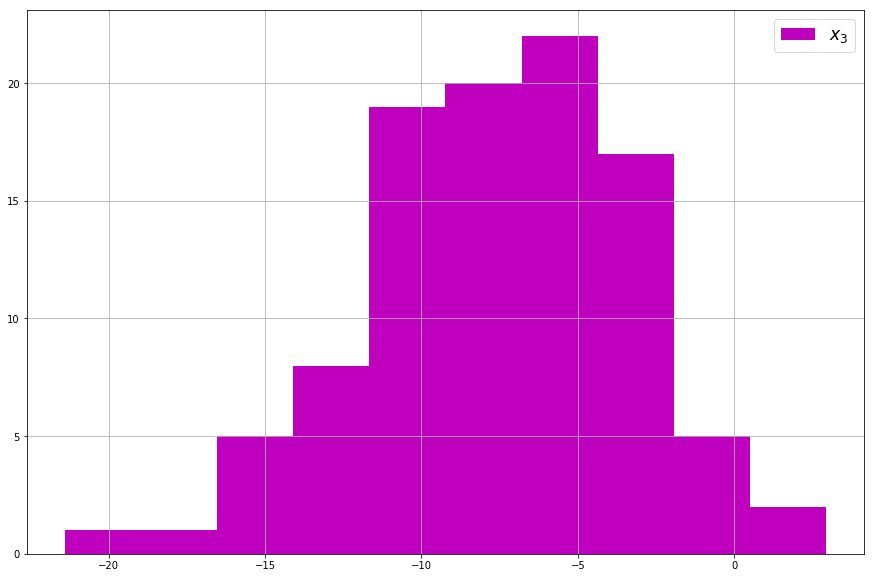

In [6]:

colors = ['r','b','g','m']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture100_component_'+str(i)+'_run11.png')
    plt.show()

In [8]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=100000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 9
Time to converges the FastICA: 0.006 seconds


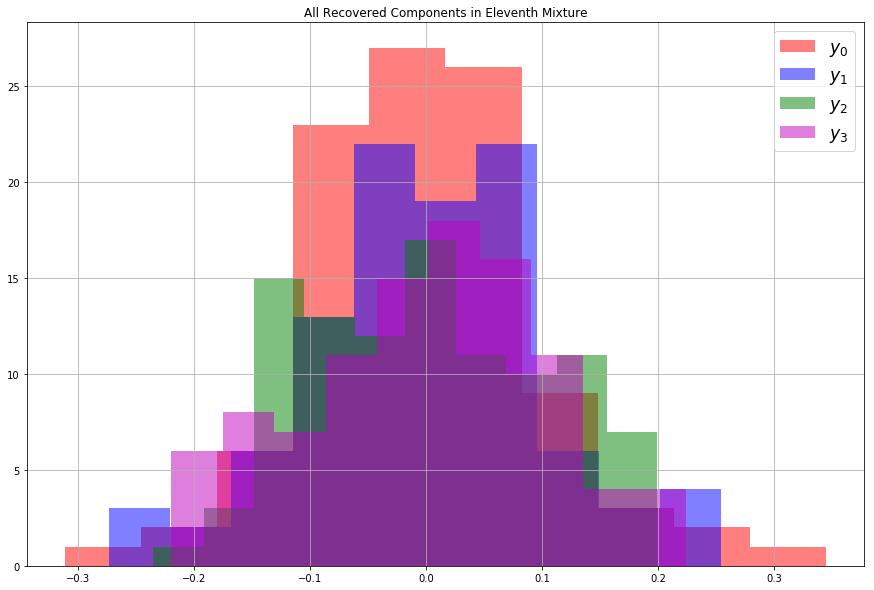

In [11]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in Eleventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA100_all_run11.png')
plt.show()

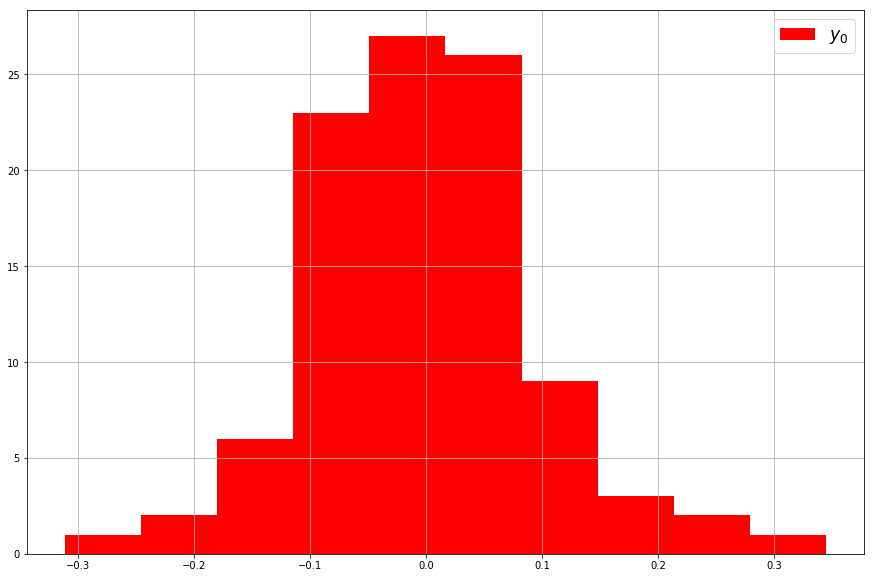

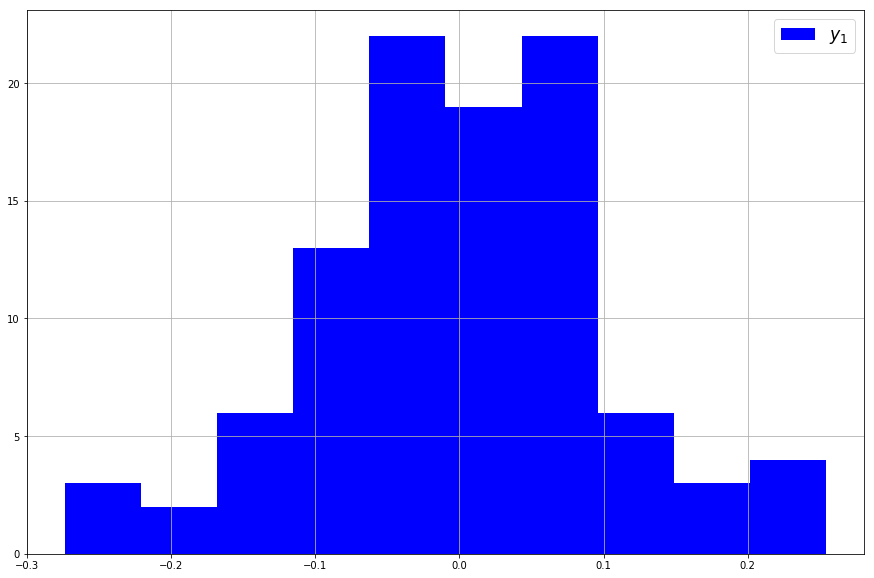

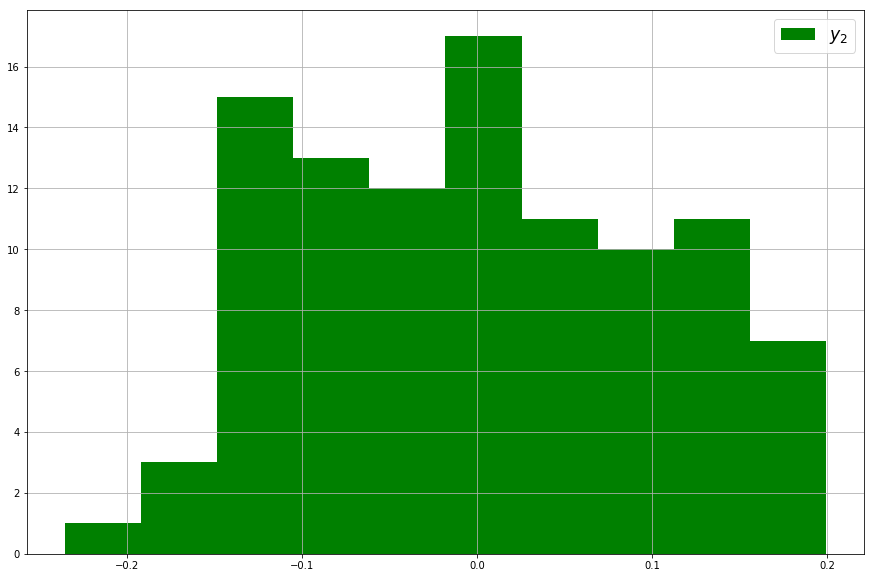

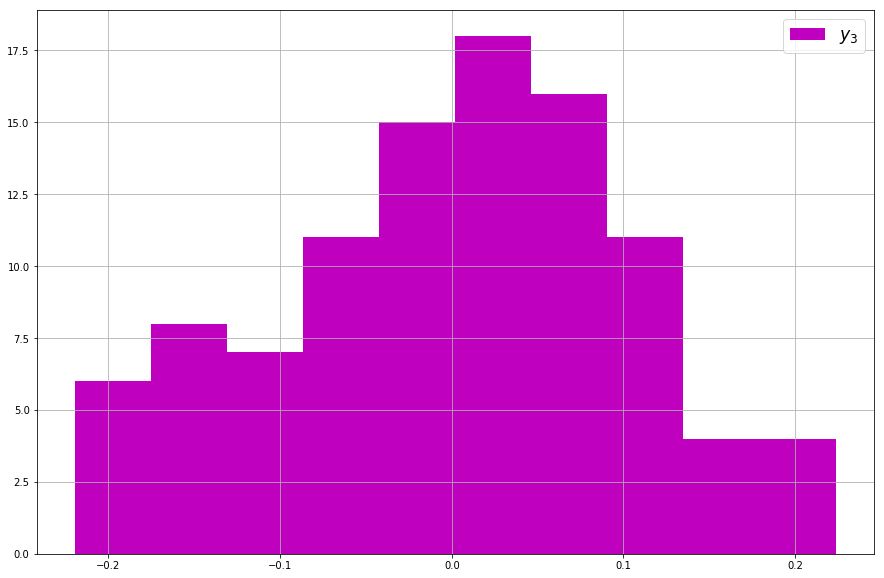

In [14]:

colors = ['r','b','g','m']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA100_component_'+str(i)+'_run11.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


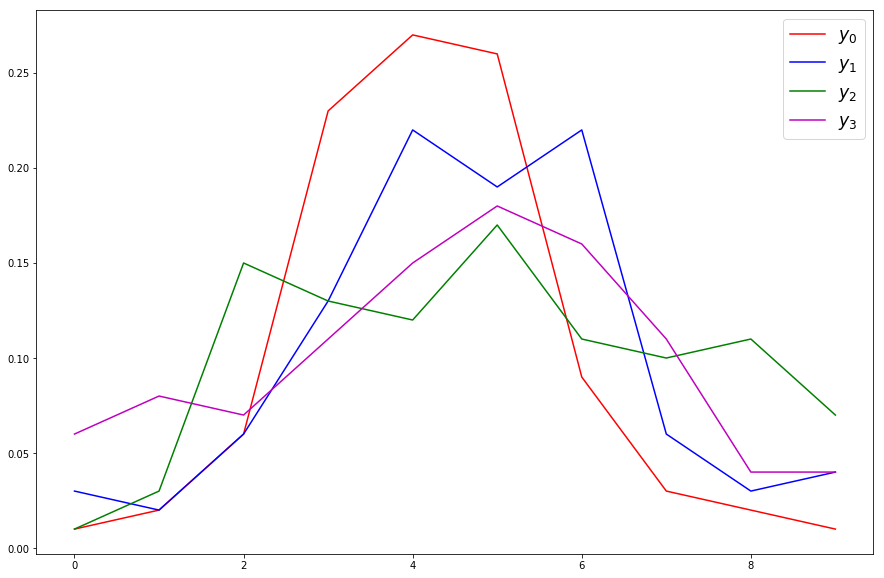

In [17]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA100_run11.png')
plt.show()

In [18]:
# normalize the recovered sources 
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [19]:
bins = 25

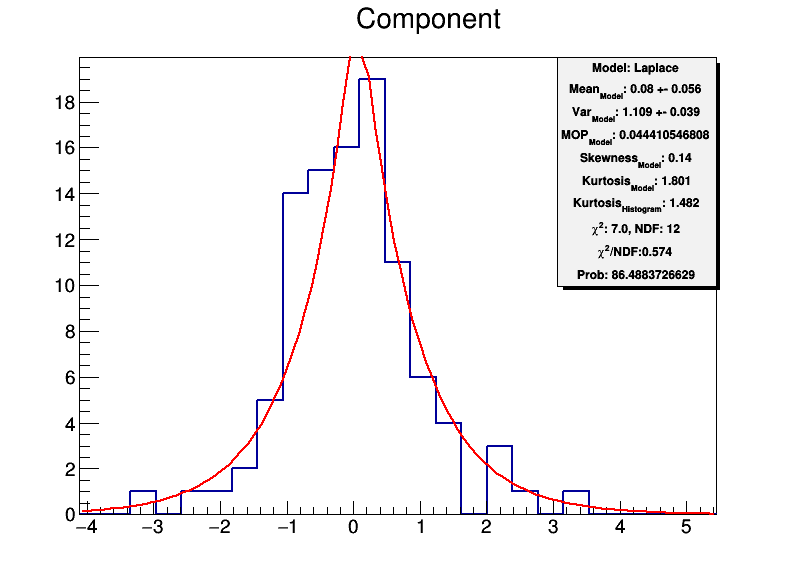

In [20]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='V')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_100_run11.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


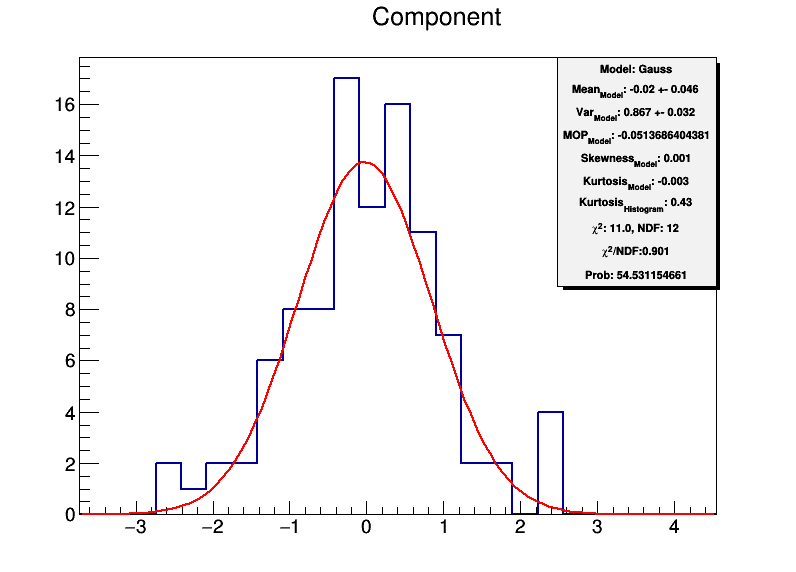

In [21]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins,np.min(normalized_sources[1,:])-1, np.max(normalized_sources[1,:])+2)
root_numpy.fill_hist(hist,normalized_sources[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[1,:]),np.max(normalized_sources[1,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_100_run11.png')
c

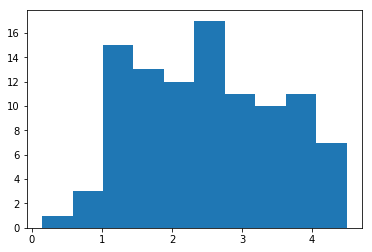

In [23]:
plt.hist(normalized_sources[2,:]+2.5)
plt.show()

In [25]:
K = normalized_sources[2,:]+2.5

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


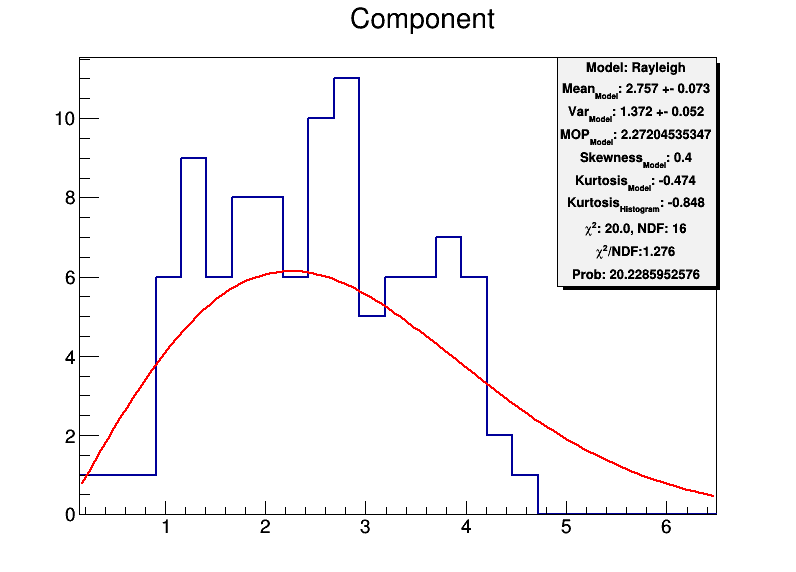

In [26]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(K),np.max(K)+2)
root_numpy.fill_hist(hist,K)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitRayleigh(hist,np.min(K),np.max(K),fit_options='')
fit.SetLineColor(kRed)
hist.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_100_run11.png')
c

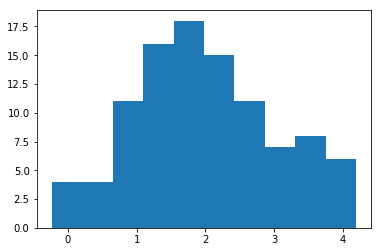

In [30]:
plt.hist(normalized_sources[3,:]*(-1)+2)
plt.show()

In [34]:
K = normalized_sources[3,:]*(-1)+2.2

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


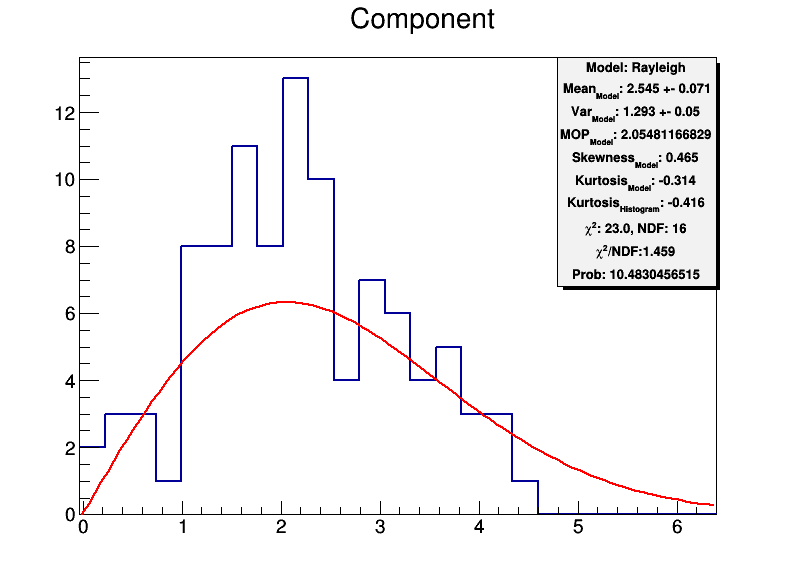

In [37]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(K),np.max(K)+2)
root_numpy.fill_hist(hist,K)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitRayleigh(hist,np.min(K),np.max(K),fit_options='')
fit.SetLineColor(kRed)
hist.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent4_100_run11.png')
c

# Using 1000 stats

In [38]:
x = np.loadtxt('EleventhMixture1000Stats.txt')
x.shape

(4, 1000)

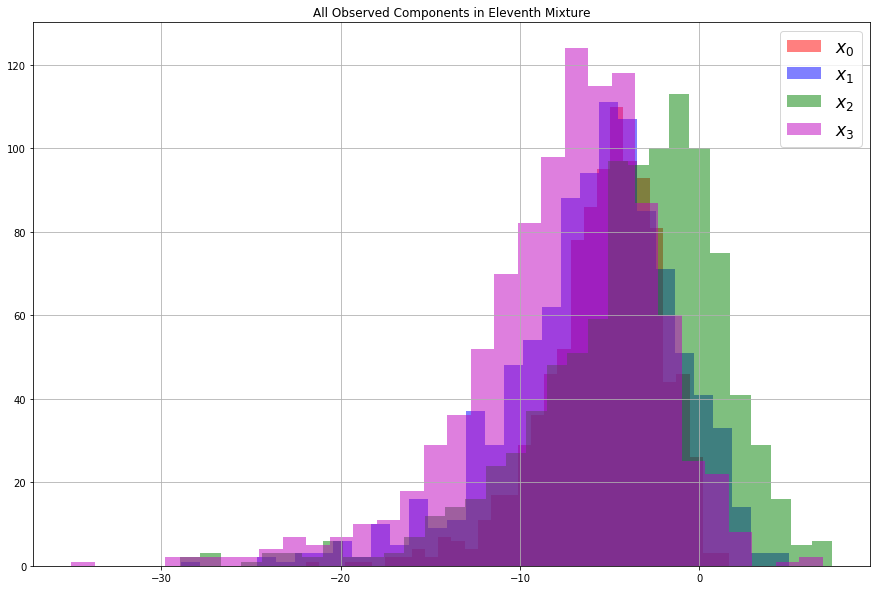

In [41]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in Eleventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture1000_all_run11.png')
plt.show()

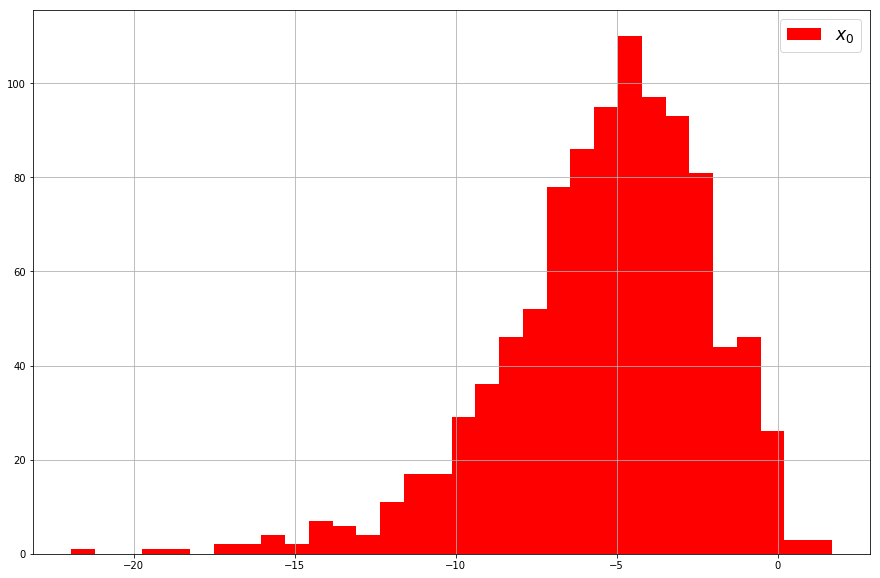

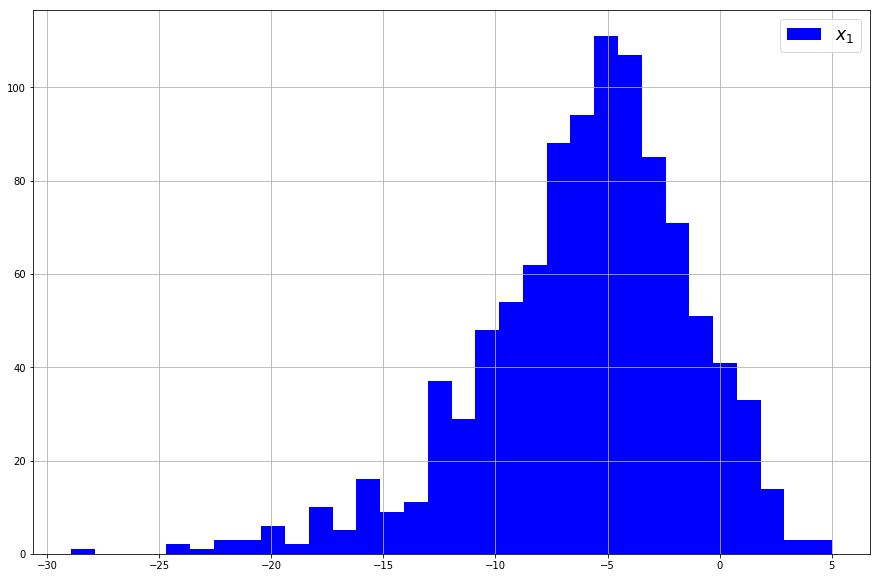

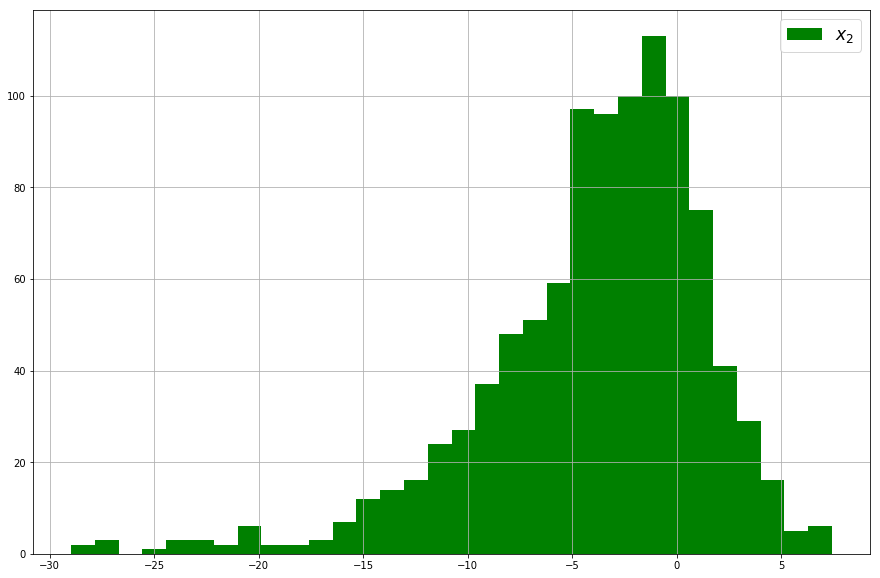

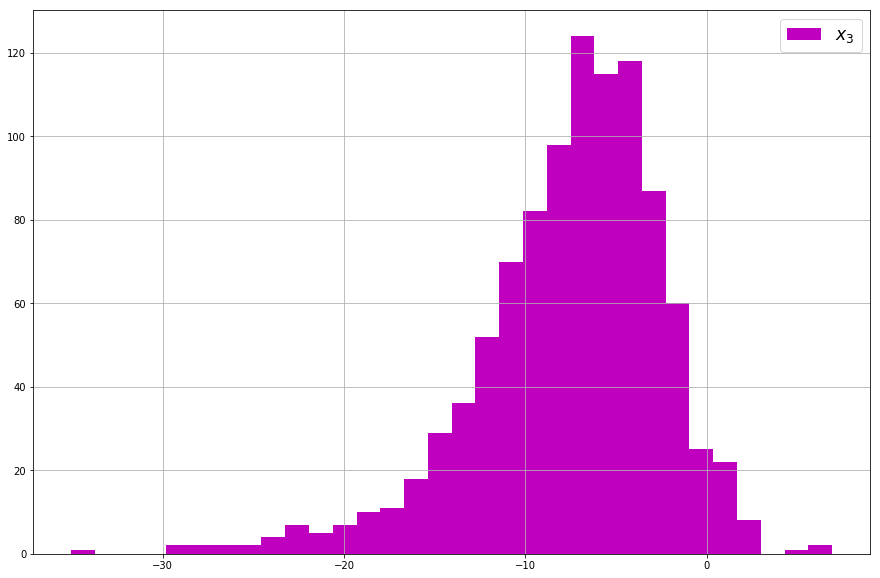

In [42]:

colors = ['r','b','g','m']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture1000_component_'+str(i)+'_run11.png')
    plt.show()

In [43]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 2707
Time to converges the FastICA: 1.151 seconds


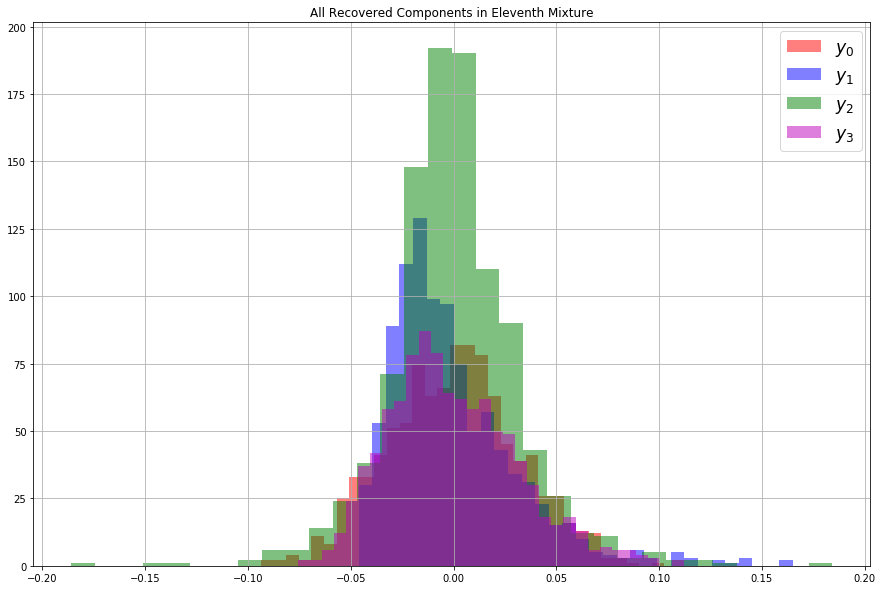

In [44]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in Eleventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA1000_all_run11.png')
plt.show()

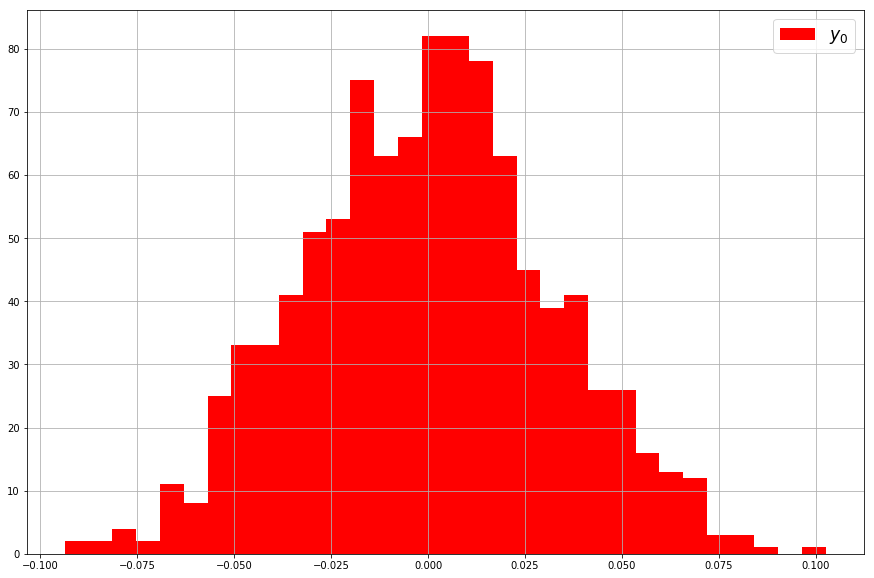

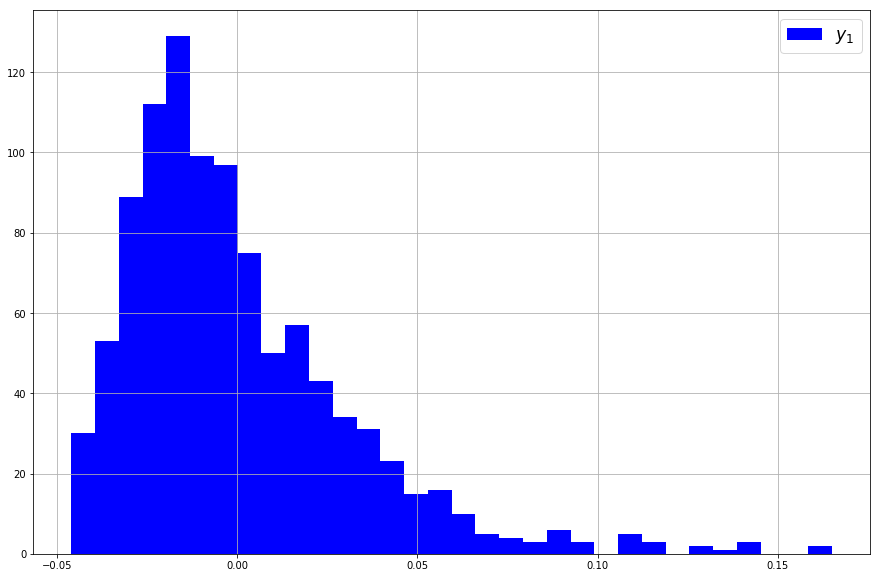

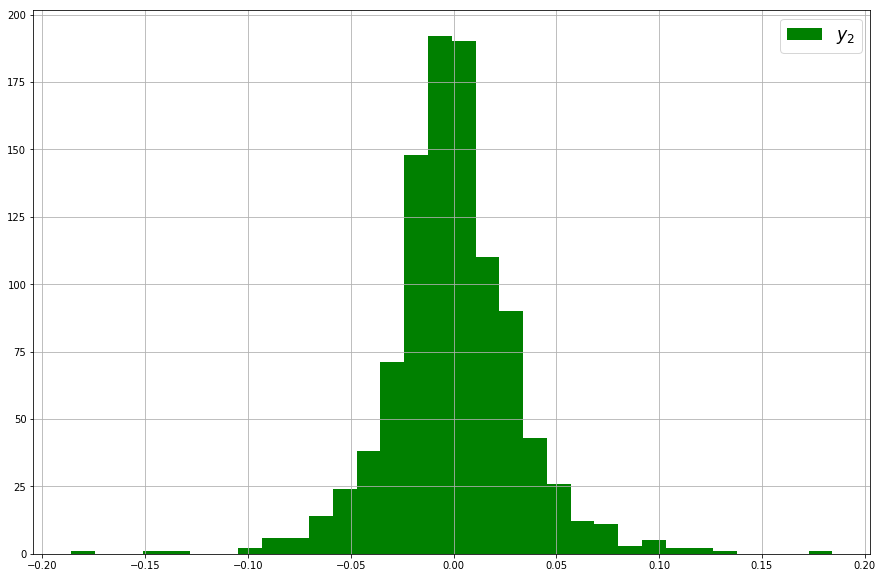

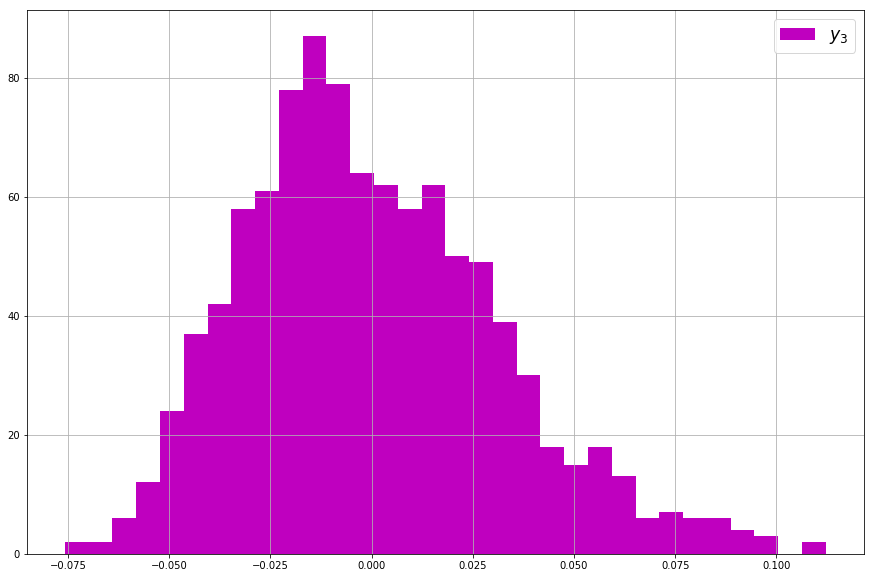

In [45]:

colors = ['r','b','g','m']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA1000_component_'+str(i)+'_run11.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


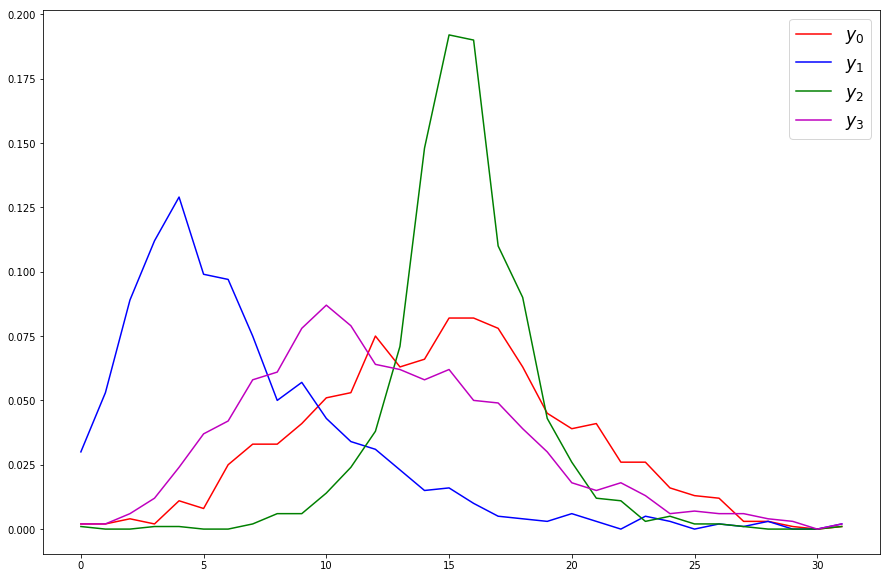

In [46]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA1000_run11.png')
plt.show()

In [47]:
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [48]:
bins = 100

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


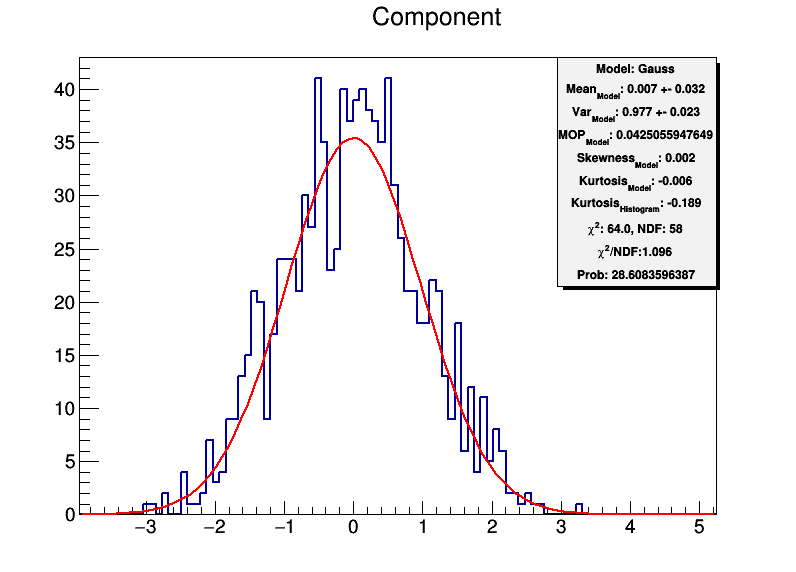

In [50]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='V')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_1000_run11.png')
c


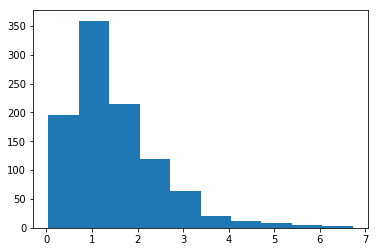

In [53]:
plt.hist(normalized_sources[1,:]+1.5)
plt.show()

In [ ]:
K = normalized_sources[1,:]+1.5

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


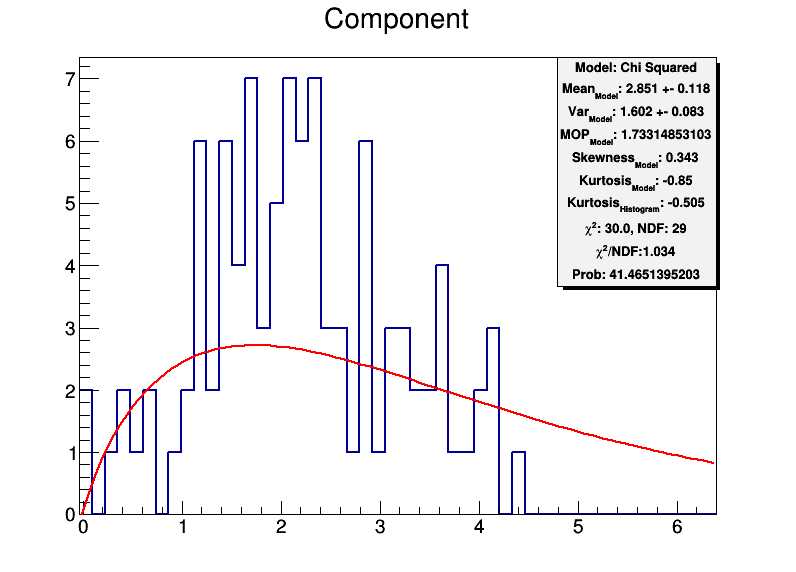

In [55]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', 50, np.min(K), np.max(K)+2)
root_numpy.fill_hist(hist,K)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitChiSquared(hist,np.min(K),np.max(K),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_1000_run11.png')
c


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


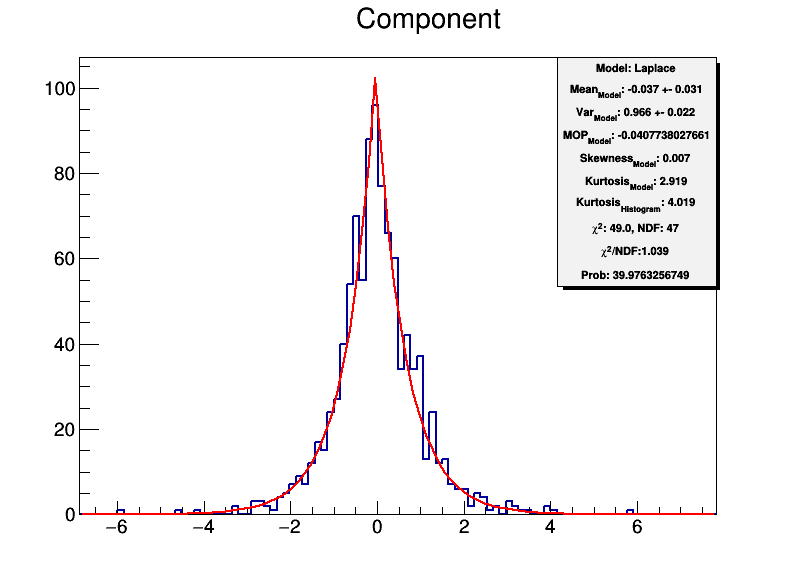

In [56]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[2,:])-1, np.max(normalized_sources[2,:])+2)
root_numpy.fill_hist(hist,normalized_sources[2,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[2,:]),np.max(normalized_sources[2,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_1000_run11.png')
c


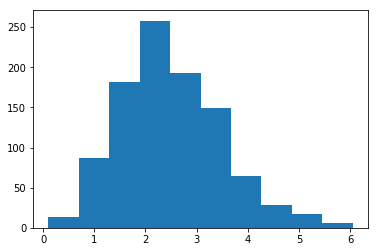

In [58]:
plt.hist(normalized_sources[3,:]+2.5)
plt.show()

In [59]:
K = normalized_sources[3,:]+2.6

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


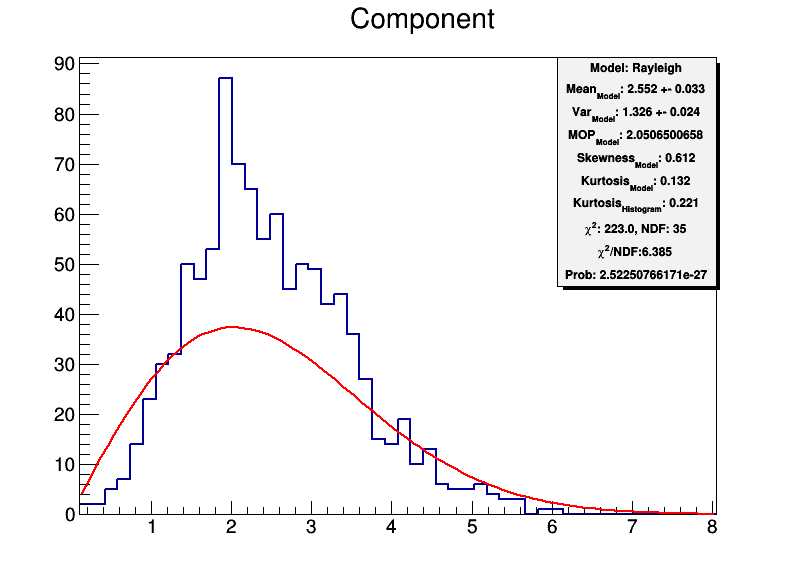

In [64]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', 50, np.min(K), np.max(K)+2)
root_numpy.fill_hist(hist,K)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitRayleigh(hist,np.min(K),np.max(K),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent4_1000_run11.png')
c


# Using 100K stats

In [65]:
x = np.loadtxt('EleventhMixture100000Stats.txt')
x.shape

(4, 100000)

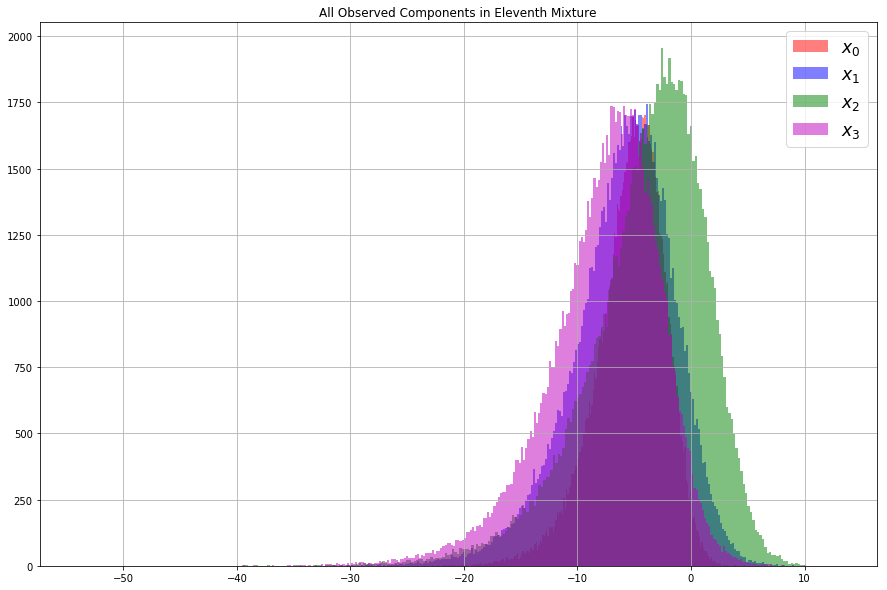

In [66]:
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$x_%.f$'%(i))

plt.title('All Observed Components in Eleventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'Mixture100000_all_run11.png')
plt.show()

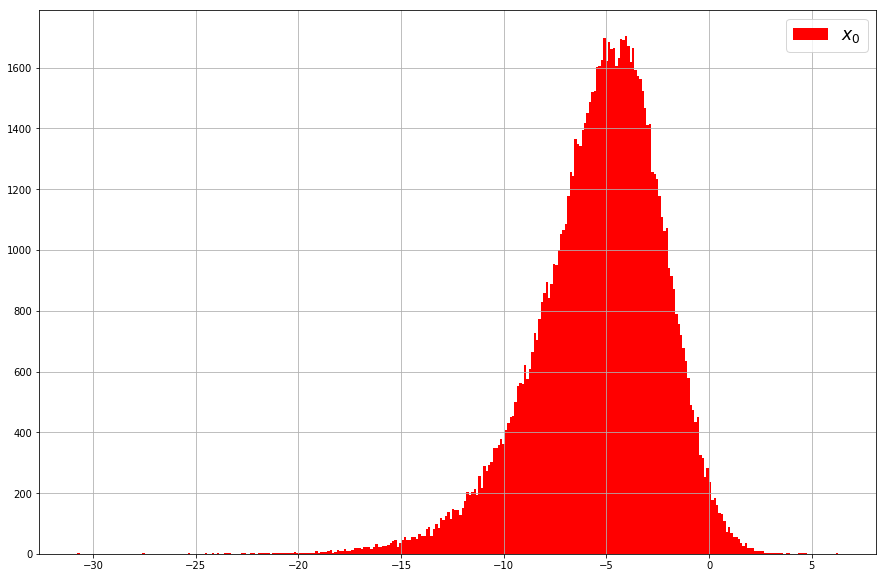

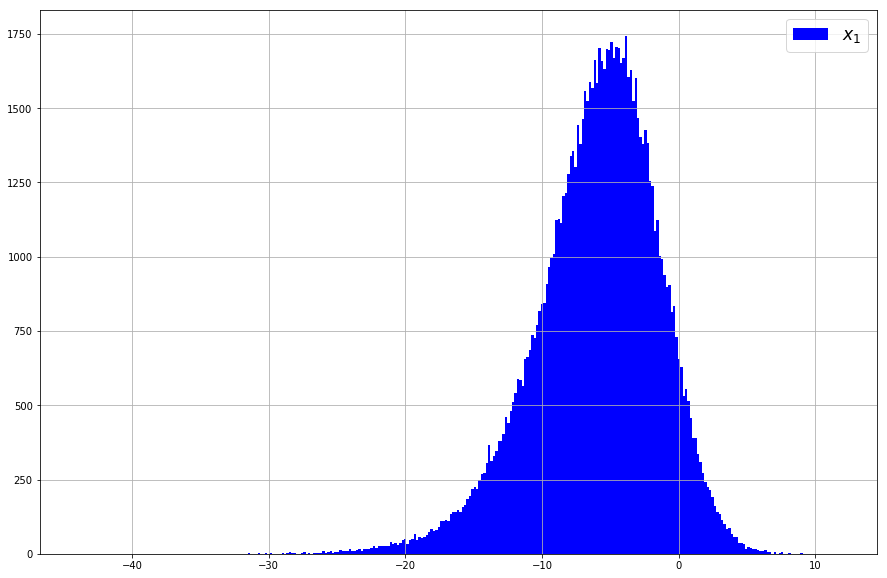

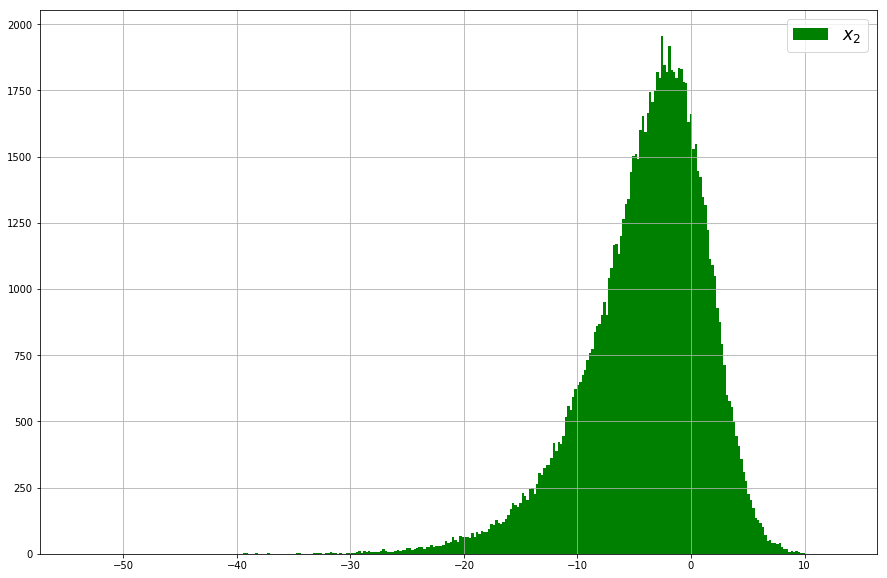

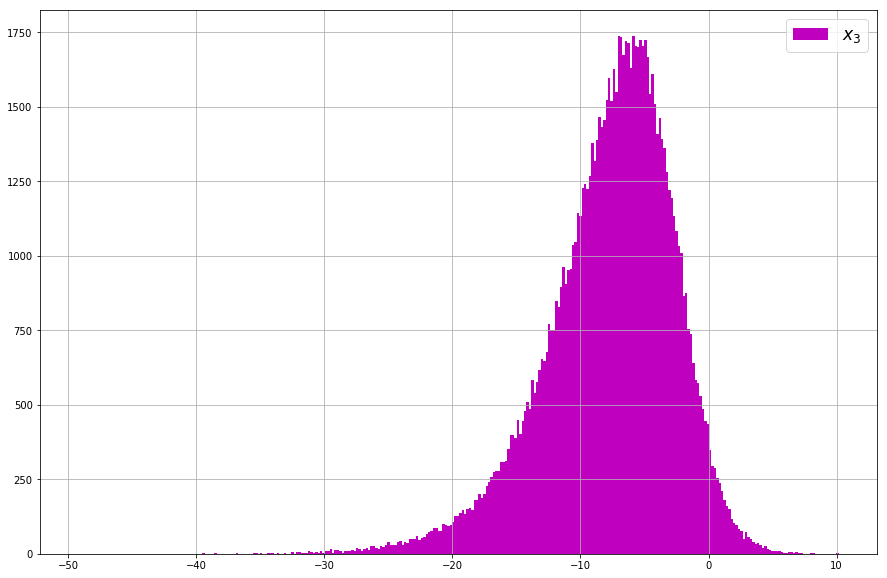

In [67]:

colors = ['r','b','g','m']
for i in range(x.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(x[i,:],bins='sqrt',color=colors[i],label=r'$x_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'Mixture100000_component_'+str(i)+'_run11.png')
    plt.show()

In [68]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=1000000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 6
Time to converges the FastICA: 0.218 seconds


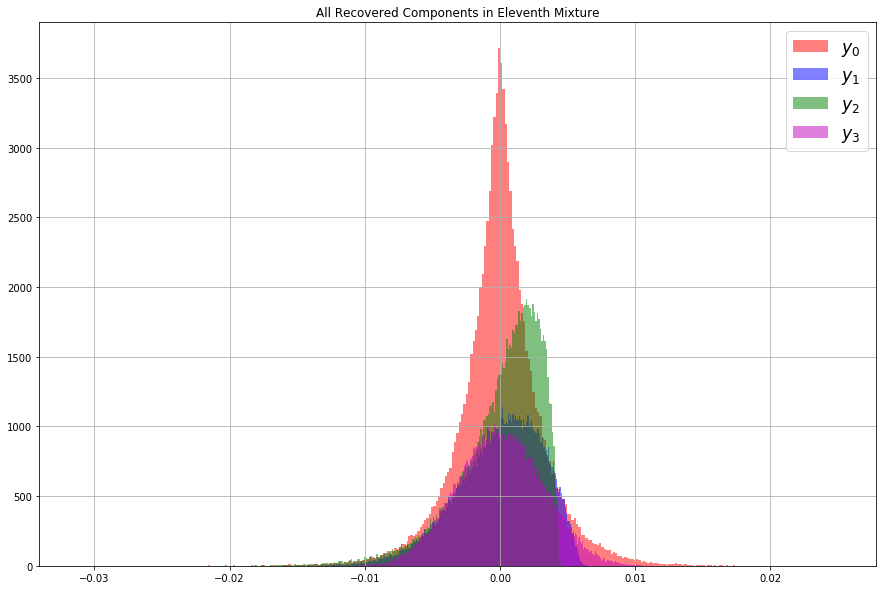

In [69]:
# plot all recovered sources
fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for i in range(recovered_sources.shape[0]):
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],alpha=.5,label=r'$y_%.f$'%(i))

plt.title('All Recovered Components in Eleventh Mixture')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.savefig(save_images+'/'+'ICA100000_all_run11.png')
plt.show()

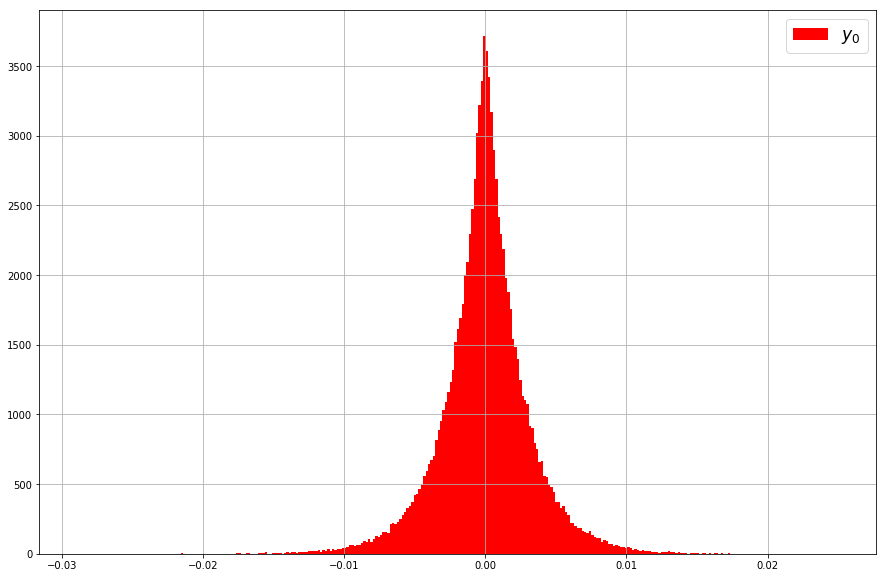

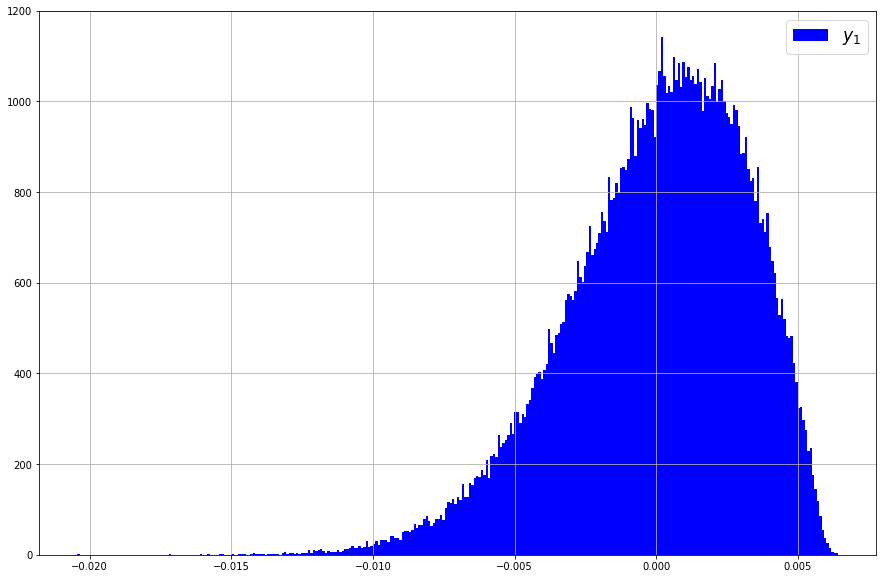

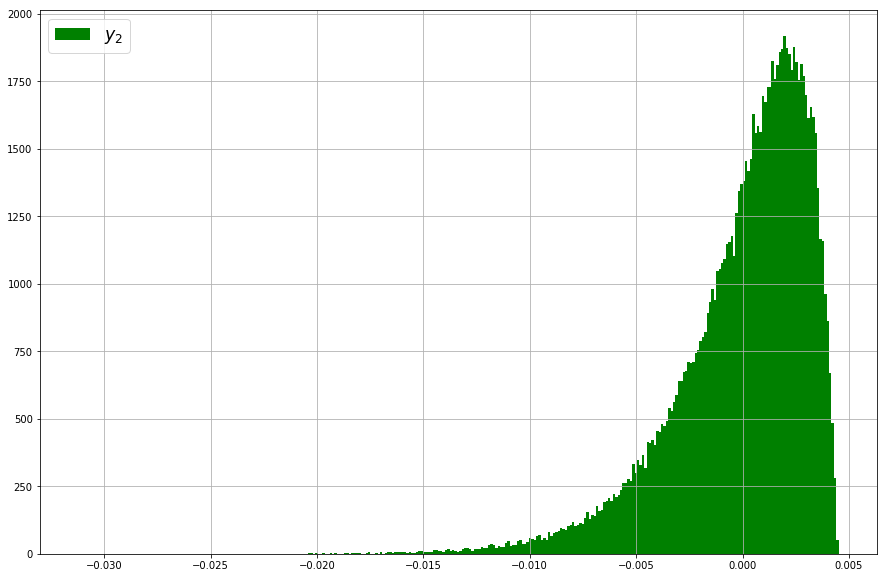

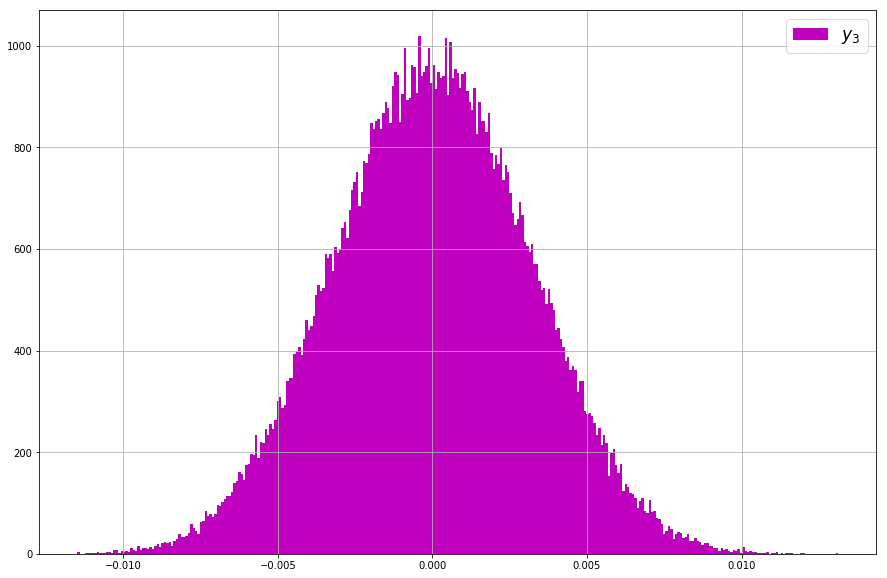

In [70]:

colors = ['r','b','g','m']
for i in range(recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    plt.hist(recovered_sources[i,:],bins='sqrt',color=colors[i],label=r'$y_%.f$'%(i))
    #plt.title('')
    plt.legend(fontsize = 'xx-large')
    plt.grid()
    plt.savefig(save_images+'/'+'ICA10000_component_'+str(i)+'_run11.png')
    plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


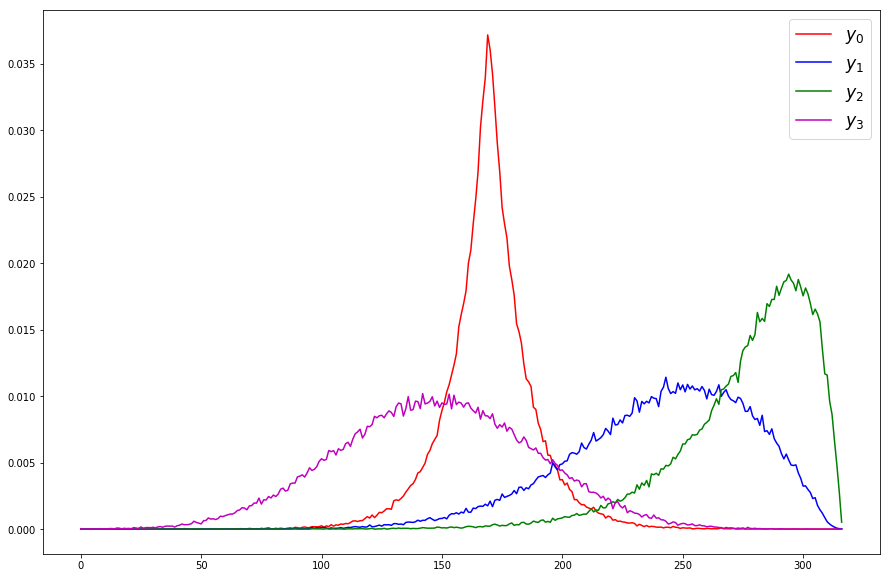

In [71]:
# Estimate the pdf of independents components
list_pdf = []
for j in range(recovered_sources.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(recovered_sources[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))
colors = ['r','b','g','m']
for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],color=colors[k],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.savefig(save_images+'/'+'Estimated_pdf_ICA100000_run11.png')
plt.show()

In [72]:
from sklearn.preprocessing import scale
normalized_sources = np.zeros_like(recovered_sources)
for i in range(recovered_sources.shape[0]):
    normalized_sources[i,:] = scale(recovered_sources[i,:])

In [73]:
bins = 150

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


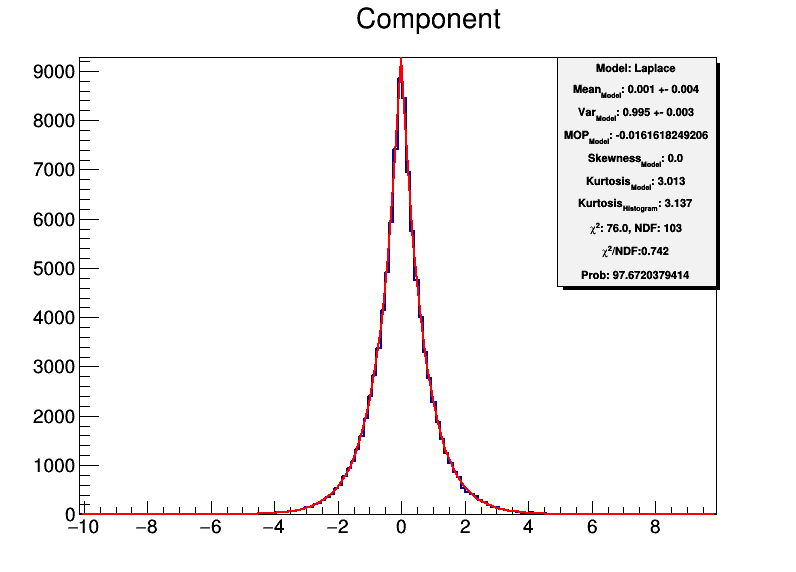

In [76]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[0,:])-1, np.max(normalized_sources[0,:])+2)
root_numpy.fill_hist(hist,normalized_sources[0,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitLaplace(hist,np.min(normalized_sources[0,:]),np.max(normalized_sources[0,:]),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent1_100000_run11.png')
c

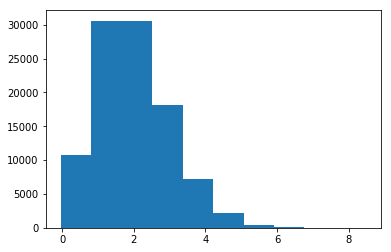

In [78]:
plt.hist(normalized_sources[1,:]*(-1)+2)
plt.show()

In [86]:
K = normalized_sources[1,:]*(-1)+2

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


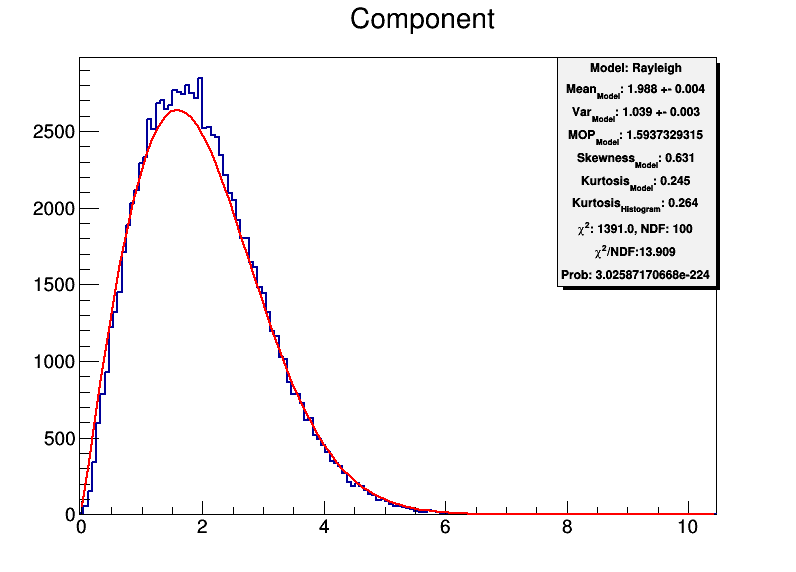

In [93]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', bins, np.min(K), np.max(K)+2)
root_numpy.fill_hist(hist,K)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitRayleigh(hist,np.min(K),np.max(K),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent2_100000_run11.png')
c

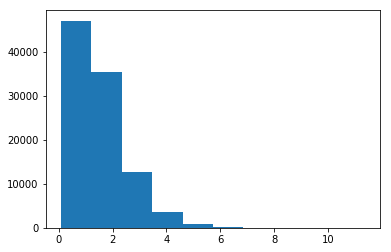

In [95]:
plt.hist(normalized_sources[2,:]*(-1)+1.5)
plt.show()

In [96]:
K = normalized_sources[2,:]*(-1)+1.5

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


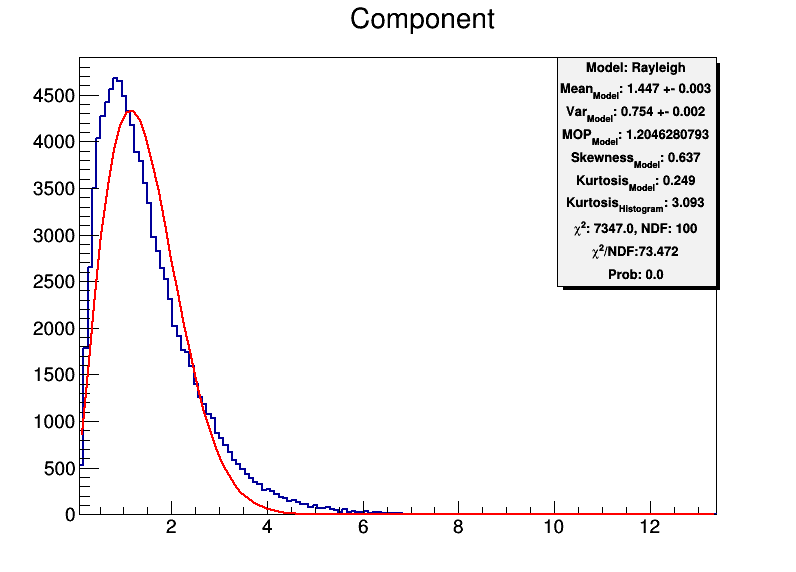

In [101]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = TH1D('Component', 'Component', 150, np.min(K), np.max(K)+2)
root_numpy.fill_hist(hist,K)
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitRayleigh(hist,0,np.max(K),fit_options='')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent3_100000_run11.png')
c

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Component (Potential memory leak).


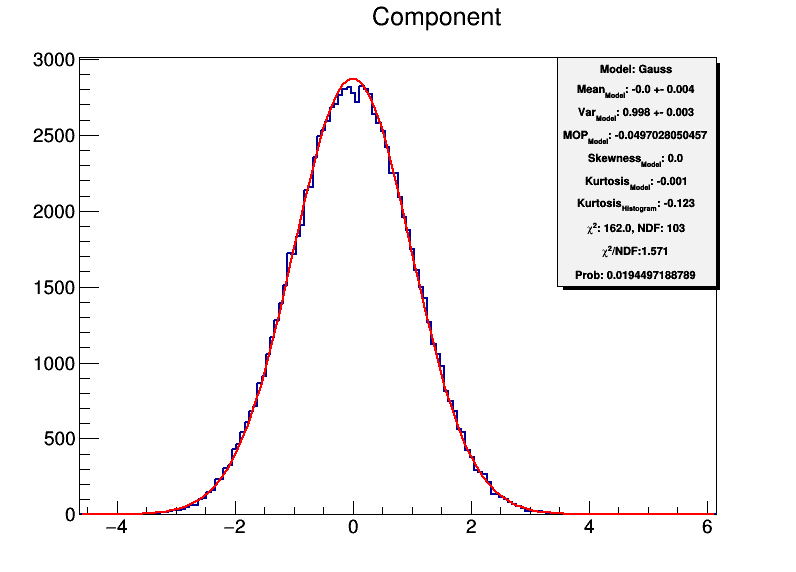

In [91]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)


hist = TH1D('Component', 'Component', bins, np.min(normalized_sources[3,:])-1, np.max(normalized_sources[3,:])+2)
root_numpy.fill_hist(hist,normalized_sources[3,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
hist.Draw()

fit = FitFunctions.fitGauss(hist,np.min(normalized_sources[3,:]),np.max(normalized_sources[3,:]),fit_options='V')
fit.SetLineColor(kRed)
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5,0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: "+str(100*fit.GetProb()))
fitlabel.Draw()
c.Print(save_images+'/'+'FitComponent4_100000_run11.png')
c